## calc_force development portal ##
This is designed to be a testing module.  <br/>
Development Process:
1. (Backward Propagaion) Breakdown the package design from the module, design the classes necessary. 
2. (Forward Propagation) Develop the individual modules one by one in Ipython notebook. 
3. Test the code.
4. Package the code into individual pure functions. 
5. Test each individual functions in iPython notebook.
6. Port everything back to the module. 

### Section 1 Keras IO ###

### 1.0 Import the entire sub neural network from h5 file ###
* Load the subnetwork directly from h5 requires to compile it again, which may lead to problem

In [1]:
import sys
sys.path.insert(0,"../") # Add the directory to Python Path to import functions from other modules for testing. 
print(sys.path)
save_dir = "../model/dftb"
import os

['../', '', '/home/junmian/Coding_Prac/ASE_ANI-master/lib', '/home/junmian/Applications/YeltsinNet/Calculator', '/home/junmian/anaconda3/envs/tensorflow/lib/python36.zip', '/home/junmian/anaconda3/envs/tensorflow/lib/python3.6', '/home/junmian/anaconda3/envs/tensorflow/lib/python3.6/lib-dynload', '/home/junmian/.local/lib/python3.6/site-packages', '/home/junmian/anaconda3/envs/tensorflow/lib/python3.6/site-packages', '/home/junmian/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/extensions', '/home/junmian/.ipython']


In [2]:
import keras
from keras.models import load_model

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.models import model_from_json
from keras import backend as K
from YeltsinNet.src_nogrd import at_idx_map_generator

# TODO: Automate the process of loading individual sub-network for each element. 
c_subnet = load_model(os.path.join(save_dir, "C-subnet.h5"))
o_subnet = load_model(os.path.join(save_dir, "O-subnet.h5"))
h_subnet = load_model(os.path.join(save_dir, "H-subnet.h5"))
n_subnet = load_model(os.path.join(save_dir, "N-subnet.h5"))



Using TensorFlow backend.
/home/junmian/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [3]:
c_subnet.summary()
c_subnet.compile(loss='mean_squared_error',
              optimizer=Adam(lr=0.001,decay=1e-5),
              metrics=['mean_squared_error', 'mean_absolute_error'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 34)                9418      
_________________________________________________________________
dense_10 (Dense)             (None, 34)                1190      
_________________________________________________________________
dense_11 (Dense)             (None, 34)                1190      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 35        
Total params: 11,833
Trainable params: 11,833
Non-trainable params: 0
_________________________________________________________________


### 1.1 Import and Test Importing the entire Framework ###

* If save the main framework by the save(.h5) file method, we are able to preserve the compile information 
* Problem: The layer name is not saved anymore

In [4]:

#     u = pickle._Unpickler(inp_test_pkl_file)
#     u.encoding = 'latin1'
#     p = u.load()
#     print(p)
#print(inp_test)




from ModelIO import read_data_from_pickle

inp_test = read_data_from_pickle(save_dir, "inp_test.pkl")
#y_pred = read_data_from_pickle(save_dir, "y_pred.pkl")
y_obs = read_data_from_pickle(save_dir, "y_obs.pkl")

In [5]:
#c_weights = c_subnet.load_weights()
model = load_model("../model/dftb/model.h5")

In [6]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
H-3-ele (InputLayer)            (None, 276)          0                                            
__________________________________________________________________________________________________
H-4-ele (InputLayer)            (None, 276)          0                                            
__________________________________________________________________________________________________
H-6-ele (InputLayer)            (None, 276)          0                                            
__________________________________________________________________________________________________
H-7-ele (InputLayer)            (None, 276)          0                                            
__________________________________________________________________________________________________
H-9-ele (I

/home/junmian/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Test Set Prediction')

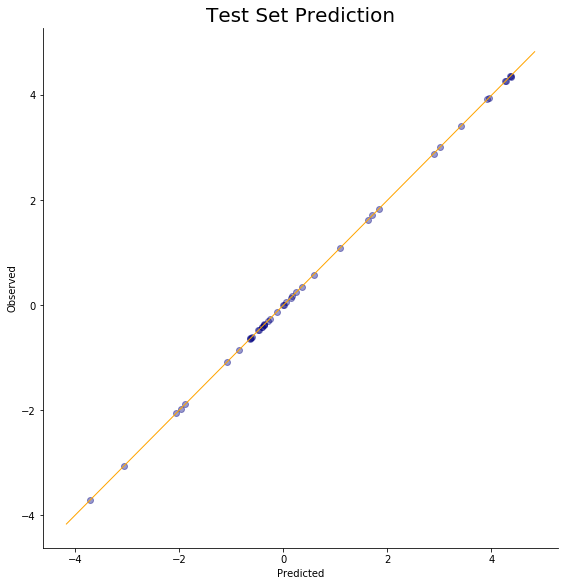

In [7]:
# Scatter plot of predicted and true values of energies in the test set




y_pred_scaled = model.predict(inp_test)
y_pred = y_pred_scaled.T[0]  # in kcal/mol unit
#y_obs = y_test #/Eunit




###########
x1 = pd.Series(y_pred, name="Predicted")
x2 = pd.Series(y_obs, name="Observed")

data1 = pd.concat([x1, x2], axis=1)
g = sns.lmplot("Predicted", "Observed", data1,
           scatter_kws={"marker": ".", "color": "navy", "alpha": 0.4 },
           line_kws={"linewidth": 1, "color": "orange"},
              height=8, aspect=1);
plt.plot(ls="--", c=".1")
plt.title('Test Set Prediction', fontsize=20)

Looks exactly as what I want for the test. 

### 1.2 Import and test the sub-neural network for each element ###

In [8]:
#Gfunc_scaler = read_data_from_pickle(save_dir,"Gfunc_scaler.pkl")
#Feat_scaler = read_data_from_pickle(save_dir, "Feat_scaler.pkl")


In [9]:
from ModelIO import read_keras_subnet_ind

    

In [10]:
h_subnet = read_keras_subnet_ind(save_dir, "H-subnet")
o_subnet = read_keras_subnet_ind(save_dir, "O-subnet")
n_subnet = read_keras_subnet_ind(save_dir, "N-subnet")
c_subnet = read_keras_subnet_ind(save_dir, "C-subnet")

#rc_subnet = read_keras_subnet_ind(save_dir,'rc-subnet')

In [11]:
# with open("../YeltsinNet/h-subnet.json", "r") as json_file:
#     loaded_h_subnet = json_file.read()
# h_subnet = model_from_json(loaded_h_subnet)
# h_subnet.load_weights("../YeltsinNet/H-subnet-weight.h5")
# h_subnet.summary()

# Warning: Should be automated
subnet_arr = pd.Series([])
subnet_arr['H'] = h_subnet
subnet_arr['O'] = o_subnet
subnet_arr['C'] = c_subnet
subnet_arr['N'] = n_subnet

In [12]:
# rc_subnet.summary()

### 1.2 Module - Testing ###
* Test the subnet from section 2 by saving both the architecture and the weight. 
* (Optional) Generate the individualized symmetry function training set for each molecule.

## Warning about Scaling ! ##
* For the new input, you have to do the scaling process.
* HOWEVER, the Gfunc_data has already been scaled for the test, so DO NOT scale it again. 


In [13]:
# For Testing Purpose Only 
Gfunc_data = read_data_from_pickle(save_dir, "Gfunc_data_test.pkl")
Feat_data = read_data_from_pickle(save_dir, "Feat_data_test.pkl")
type(Gfunc_data)

pandas.core.series.Series

In [14]:
Gfunc_test_atom  = Gfunc_data['H'][3]
Feat_test_atom  = Feat_data['H'][3]

print(Gfunc_test_atom.shape)


(432, 276)


I will predict to form an array of atomic energy.

In [15]:
e_atom_test = h_subnet.predict(Gfunc_test_atom)
#print(e_atom_test)

### Section 2 Testing the Weight ###
Layer structure notes:
* weight[0] is the input layer with shape (nb_samples, nb_nodes)
* weight[1] is the bias for the input layer (bias always has the shape (34,) )
* weight[2*(n)] is the weight for the n-th layer
* weight[2*n +1] is the bias for the n-th layer

In [16]:
## Neural Network ##

h_subnet_weight_list = h_subnet.get_weights()
# print(h_subnet_weight_list[0])
# print(h_subnet_weight_list[1])
# print(h_subnet_weight_list[2])
# print(h_subnet_weight_list[3])
for index, arr in enumerate(h_subnet_weight_list):
    print(index, arr.shape)

# print("weight")
# print(h_subnet_weight_list[0])
# print("bias")
# print(h_subnet_weight_list[1])
# print("weight and bias")
# print(h_subnet.get_layer("dense_9").get_weights()[0])
# print(h_subnet.get_layer("dense_9").get_weights()[1])
# h_subnet.get_layer("dense_10").get_weights()
# h_subnet.get_layer('dense_11').get_weights()
# h_subnet.get_layer('dense_12').get_weights()

# rc_subnet_weight_list = rc_subnet.get_weights()
# for index, arr in enumerate(rc_subnet_weight_list):
#     print(index, arr.shape)



0 (276, 34)
1 (34,)
2 (34, 34)
3 (34,)
4 (34, 34)
5 (34,)
6 (34, 1)
7 (1,)


### METHOD 2! Loop through the Model's Layer to get the weights ###


In [17]:
# rc_subnet.layers[0].get_weights()

In [18]:
def sort_weight_bias(subnet):
    """Sort the Weight and Bias from the weight list provided for the given subnet. 
    Into the form that weight = [nb_layers * [weight arr]]; bias   = [nb_layers * [bias arr]]
    
        Args:
            subnet: a sub-neural network (can be for element)
        Outputs: 
            sub_net_weight_arr: a np.array in the form that subnet_weight_arr[i] = weight_arr for layer i
            sub_net_bias_arr: a np.array in the form that subnet_bias_arr[i] = bias_arr for layer i            
    
    """
    # Loop through all layers
    subnet_weight_list = []
    subnet_bias_list = []
    for layer_idx in np.arange( len(subnet.layers)):
        
        subnet_weight_list.append(subnet.layers[layer_idx].get_weights()[0])
        subnet_bias_list.append(subnet.layers[layer_idx].get_weights()[1])
        
    return np.array(subnet_weight_list), np.array(subnet_bias_list)

In [19]:
subnet_weight_arr, subnet_bias_arr = sort_weight_bias(h_subnet)
subnet_weight_arr[3].shape

(34, 1)

### Section 3 Import Into the NNCalc Class ###
Design for the NNCalc Class:
* Have a list of the sub-net


Problem
* Extendability of the code. If the interface is too simple, then people have to do many of things manually. If the interface is too difficult, then it becomes very difficult to change the structure of the neural network. 

### Section 4 Implement the BackPropagation Method to get dNNdG Matrix###

In [20]:
def ddx_tanh(x):
    """Derivative of the activation function tanh(x). 
    For a given number (x), print its d(tanh)/dx 
    """
    return 1-(np.tanh(x))**2

In [21]:
def get_nth_layer_output(subnet, layer_idx, test_input):
    """Get the output for the n-th layer in the subnet
    
        Args:
            subnet: keras.model for the sub-neural network
            layer_idx: an int represent "n"-th layer. n starts with 0.
            test_input: input to be predicted by the subnet. In the shape (1, nb_symm)
            
        Outputs:
            layer_output: the output for the n-th layer of the sub-neural network.
    Comment:
    Require import keras.backend as K. 
    """
    
    get_layer_output = K.function([subnet.layers[0].input], [subnet.layers[layer_idx].output])
    layer_output = get_layer_output([test_input])[0]
    return layer_output

In [22]:
get_nth_layer_output(h_subnet, 1, Gfunc_test_atom[0:1,:]).shape

(1, 34)

In [23]:
len(get_nth_layer_output(h_subnet, 1, Gfunc_test_atom[0:1,:]))

1

In [24]:
def get_nth_layer_node_sum(subnet, layer_idx, node_idx, test_input):
    """For a given sub-neural network, get the sum of at one particular node for the n-th layer  
        
        Args:
            layer_idx: index for the layer. Starts from 0. Must be >= 1. 
            node_idx: index for the node. Starts from 1.
            test_input: must contain one and only one sample. In the shape (1, nb_symm)
        
        Outputs:
            sum: the sum of
            
    Comment: 
    Assume that all of the layers are dense layers. 
    """
    if len(test_input) != 1:
        raise ValueError("get_nth_layer_num: test_input has more than one sample")
    
    last_layer_output = get_nth_layer_output(subnet, layer_idx -1, test_input)
    
    layer = subnet.layers[layer_idx]
    # TODO: Raise Exception when the index is out of range. 
    layer_weights = layer.get_weights()[0][:,node_idx]   # 0 is the weight_arr, 1 is the bias
    sum_arr = np.dot( last_layer_output, layer_weights) 
    sum = np.sum(sum_arr)
    return sum

In [25]:
get_nth_layer_node_sum(h_subnet, 2,0, Gfunc_test_atom[0:1,:])

-0.2818091

In [26]:
h_subnet.layers[1].input_shape
h_subnet.layers[3].output_shape[1]


1

In [27]:
def get_nth_layer_sum(subnet, layer_idx, test_input):
    """For a given sub-neural network, get the sum of all of the n-th layes's node as an array
        
        Args:
            layer_idx: index for the layer. Starts from 0. Must be >= 1. 
            test_input: must contain one and only one sample. In the shape (1, nb_symm)
        
        Outputs:
            sum_arr: array of sum in the shape [sum_of_each_node * nb_nodes]
            
    Comment: 
    Assume that all of the layers are dense layers. 
    Need to improve its performance. 
    """
    # Loop all the nodes in the layer
    
    nb_nodes = subnet.layers[layer_idx].output_shape[1]
    sum_arr = np.zeros(nb_nodes)
    
    for node_idx in np.arange(nb_nodes):
        sum_arr[node_idx] = get_nth_layer_node_sum(h_subnet, layer_idx, node_idx, test_input)
    
    return sum_arr
        

In [28]:
get_nth_layer_sum(h_subnet, 1, Gfunc_test_atom[0:1,:]).shape

(34,)

### Method to Select One of atoms For Testing ###

In [29]:
Gfunc_test_atom.shape

(432, 276)

In [30]:
Gfunc_test_atom[0:1,:].shape

(1, 276)

This is the correct way to represent that particulat atoms (with index 0)
Previous ways would work in theory but work have more trouble. 

In [31]:
Gfunc_test_atom_ind = Gfunc_test_atom[0:1,:] # Equivalent to Gfunc_test_atom[0:1,:]

In [32]:
output_arr = h_subnet.predict(Gfunc_test_atom_ind)
output_arr[0]

array([0.06864072], dtype=float32)

In [33]:
subnet_weight_arr.shape

(4,)

In [34]:
total_layers = 5
hidden_layers = 4
output = np.array(1.0)
deriv_list = [0] * total_layers
deriv_list[-1] = output









for i in reversed(range(1,hidden_layers)):
    weights_trans = np.transpose(subnet_weight_arr[i])
    deriv_list[i] = np.dot(deriv_list[i+1], weights_trans) * ddx_tanh(get_nth_layer_sum(h_subnet, i, Gfunc_test_atom_ind))

                             
# Assume linear activation function used on input nodes
weights_trans = np.transpose(subnet_weight_arr[0])
deriv_list[0] = np.dot(deriv_list[1], weights_trans)
dNNdG         = np.array(deriv_list[0].transpose())


In [35]:
dNNdG.shape

(276, 1)

In [36]:
def dE_dG(subnet, input_atom):
    """Get the dE/dG array for the given input atom for a given subnet.  
    
        Args:
            subnet: the sub neural network for the 
            input_atom: the features for the given atom, 
                        Takens as Gfunc_data['H'][1][sample_idx,:]
                        or Gfunc_data['H'][1].shape = (1, nb_feature or nb_symmetry function)
                        
        Outputs: 
            dNNdG: a matrix that represents the derivatative of the subnet output with respect to each G. 
            
    Comment:
    Use the back propagation method to get the derivative. 
    
    Assume that the input layer is linear.
    Assume that the all the layer are dense.
    
    May Have problem with the number of layers. 
    May Have problem with the calculation.
    May Have problem with the intrepretation of the dNNdG matrix. 
    May Have problem with the ddx, derivative function. One of the layer is a linear layer. 
    
    Need to add the support for different activation function in different layers. 
    
    
    To improve, may calculate the dE/dG matrix for every atom at once.
    
    
    Reference: 
    From Hakkon's Derivative Function. 
    """
    nb_hidden_layers = len(subnet.layers)

    total_layers  = nb_hidden_layers + 1
    output = np.array(1.0) # # Derivative of output neruon is 1 since its f(x) = x
    deriv_list = [0] * total_layers
    deriv_list[-1] = output    
    
    subnet_weight_arr, subnet_bias_arr = sort_weight_bias(subnet)
    
    
    for i in reversed(range(1,nb_hidden_layers)):
        weights_trans = np.transpose(subnet_weight_arr[i])
        
        deriv_list[i] = np.dot(deriv_list[i+1], weights_trans) * ddx_tanh(get_nth_layer_sum(subnet, i, input_atom))    
        
    # Assume linear activation function used on input nodes
    weights_trans = np.transpose(subnet_weight_arr[0])
    deriv_list[0] = np.dot(deriv_list[1], weights_trans)
    dNNdG         = np.array(deriv_list[0].transpose())
    return dNNdG

In [37]:
dNNdG = dE_dG(h_subnet, Gfunc_test_atom_ind)

In [38]:
dNNdG

array([[-0.06144419],
       [-0.00170059],
       [-0.01169359],
       [-0.00433851],
       [-0.01016771],
       [ 0.00691304],
       [-0.0158097 ],
       [-0.00812962],
       [ 0.01354129],
       [ 0.02500608],
       [ 0.01203969],
       [ 0.0081634 ],
       [-0.00240614],
       [ 0.00980248],
       [ 0.00695324],
       [ 0.00021657],
       [ 0.00129369],
       [ 0.00103438],
       [ 0.00081222],
       [ 0.02038322],
       [ 0.02080598],
       [ 0.00848306],
       [ 0.00528582],
       [ 0.00285827],
       [-0.01766306],
       [-0.02082074],
       [-0.01282738],
       [-0.03800031],
       [-0.00624077],
       [ 0.03264318],
       [-0.00294466],
       [-0.00455085],
       [-0.01697933],
       [ 0.00939922],
       [ 0.00372137],
       [-0.01218219],
       [ 0.01796843],
       [ 0.00212964],
       [ 0.0340154 ],
       [-0.00137848],
       [ 0.01268408],
       [ 0.0074545 ],
       [ 0.01452488],
       [ 0.02228102],
       [-0.00170796],
       [ 0

### Temporary Strategy for dG/dx ###
Since a radical replacement for the symmetry function kernel is expected, current strategy would be just to replace the Gfunc with Gfund_derivative in the original Nguyen's implementation. 


<br/>
Symmetry function kernel replacement TODO list: <br/>
* Support for the individual atom symmetry function <br/>
* Support for different framewor<br/>
* Better performance using numpy array. 
* Support neighbour atom list

In [39]:
def symm_deriv_ind(at_idx_map, Gparam_dict, atoms, atom_idx, at_ref):
    """ !!!! Serve Only as a Temploate for symm_func_ind
    calculate symmetry functions derivative. 
    For this function, I just want one of the coordinates. Not an array of everything
    
        Args:
            distances: distance values; pandas dataframe of shape (nb_samples, nb_distances)
            at_idx_map: a mapping between atom types and atom indexes; dictionary
            Gparam_dict: symmetry function parameters;
                            dictionary with 1st layer keys  = atom types,
                                2nd layer keys = symmetry function types (radial or angular)
                                values = 2D arrays of sym. function parameters of
                                shape (nb_sym_functions, nb_filter_parameters)
            atom: ase.atoms object that represent that particular atom
            atom_idx: index of the atom for the given neural network. 
            atom_ref: index of the atom for the given 

        Outputs: 
           Gfunc_data: symmetry function values;
                        dictionary with 1st layer keys = atom types,
                            2nd layer keys = atom indexes,
                            values = 2D arrays with shape=(nb_samples, nb_sym_functions)
                            
    Comment:
    This function is temporary. More Radical changes are expected. 
    Just help to develop the framework. 
    
    ! Currently using brutal force implementation, to generalize this function for dG with any dxi. 

    """


    # This for loop goes through elements
    # Are together
    at_type = atoms[atom_idx].symbol
    Gparam_rad = Gparam_dict[at_type]['rad'] # Problem Here
    Gparam_ang = Gparam_dict[at_type]['ang'] # Problem Here

    rad_count = sum([Gparam_rad[t].shape[0] for t in Gparam_rad.keys()])
    ang_count = sum([Gparam_ang[t].shape[0] for t in Gparam_ang.keys()])
    
    xyz_ref = atoms[at_ref].position
    xyz_i = atoms[atom_idx].position


    ## This for loop goes through all the atoms (belong to the same element)
    Gfunc_data = np.zeros(((rad_count + ang_count), 3))

    G_temp_count = 0


    # radial components
    # Loop through different elements
    for at2_type in Gparam_rad.keys():
        comp_count =  Gparam_rad[at2_type].shape[0]
        G_temp_component = np.zeros((comp_count, 3)) # Will store the array of the [dx, dy, dz]
        
        # One count is for one set of parameter values
        for count, values in enumerate(Gparam_rad[at2_type]):
            # Summing up the contribution from different distance values. 
            for at2 in at_idx_map[at2_type][at_idx_map[at2_type]!=atom_idx]:
                R12 = distance_ind(atoms[atom_idx], atoms[at2])
                
                xyz_j = atoms[at2].position
                # values[0] = Rs, values[1] = eta (integer, not array)
                # Then Calculate the radial symmetric function -> value of G.
                rad_temp = ddR_radial_filter_ind(values[0], values[1], R12, xyz_i, xyz_j, xyz_ref)
                G_temp_component[count, 0:3] += rad_temp
                if np.any(rad_temp > 3000):
                    import pdb; pdb.set_trace()

        Gfunc_data[G_temp_count:G_temp_count+comp_count, 0:3] = G_temp_component
        G_temp_count += comp_count

    # ======================
    # angular components
    for atAatB_type in Gparam_ang.keys():
        comp_count = Gparam_ang[atAatB_type].shape[0]
        G_temp_component = np.zeros((comp_count,3))

        # This for loop goes through all 'HH', 'HO' combo?
        for count, values in enumerate(Gparam_ang[atAatB_type]):
            atA_list = at_idx_map[atAatB_type[0]][at_idx_map[atAatB_type[0]]!=atom_idx]
            for atA in atA_list:

                R1A = distance_ind(atoms[atom_idx], atoms[atA]);
                
                if atAatB_type[0] == atAatB_type[1]:
                    atB_list = at_idx_map[atAatB_type[1]][(at_idx_map[atAatB_type[1]]!=atom_idx) & (at_idx_map[atAatB_type[1]]>atA)]
                else:
                    atB_list = at_idx_map[atAatB_type[1]][(at_idx_map[atAatB_type[1]]!=atom_idx)]

                for atB in atB_list:
                    #R1B = 1
                    #RAB = 1
                    
                    R1B = distance_ind(atoms[atom_idx], atoms[atB])
                    RAB = distance_ind(atoms[atA], atoms[atB])               
                    
                    xyz_j = atoms[atA].position
                    xyz_k = atoms[atB].position
                                   

                    ang_temp = ddR_angular_filter_ind(R1A, R1B, RAB, values[0], values[1], values[2], xyz_i, xyz_j, xyz_k, xyz_ref)
                    if np.any(ang_temp > 3000):
                        import pdb; pdb.set_trace()
                        ddR_angular_filter_ind(R1A, R1B, RAB, values[0], values[1], values[2], xyz_i, xyz_j, xyz_k, xyz_ref)

                    G_temp_component[ count, 0:3] += ang_temp
                    

        Gfunc_data[G_temp_count:G_temp_count+comp_count, 0:3] = G_temp_component
        G_temp_count += comp_count
    return Gfunc_data    

In [40]:
def distance_ind(atom_1, atom_2):
    """Calculate the distance between two atoms. 
        Args:
            atom_1: ase.atom object
            atom_2: ase.atom object
            
        Return:
            Rij: distance for the atoms in angstroms
    """
    
    r = np.sqrt(np.sum((atom_1.position - atom_2.position)**2, axis = 0))
    return r

In [41]:
def distance_xyz(xyz_i, xyz_j):
    return np.sqrt(np.sum((xyz_i - xyz_j)**2, axis = 0))

In [71]:
md_samplesArr = pd.read_pickle('../md_capture/md_samplesArr.pkl')
distance_xyz(np.array([0,0,0]), np.array([1,2,3]))

3.7416573867739413

In [43]:
print(md_samplesArr[0][0])
print(md_samplesArr[0][1])

distance_ind(md_samplesArr[0][0], md_samplesArr[0][1])

Atom('C', [-0.93905, 0.4025, 2.65321], index=0)
Atom('O', [0.13095, 0.4025, 2.65321], index=1)


1.07

In [44]:
at_idx_map = at_idx_map_generator(md_samplesArr[0])

10


In [75]:
# # Objective_1: Write the code that automatically generate ang-comp
# # Objective_2: Write the code that automate the parameter generation process (Not just for 'O')

# # radial symmetry function parameters
# # Need to automate the Rs_array part
# Rs_array = np.linspace(0.8,8,num= 24)   # based on max and min of the distances
# eta_array = 1./(2.0*np.square(0.2*Rs_array))
# rad_params = np.array([(Rs_array[i],eta_array[i]) for i in range(len(Rs_array)) ])
# # angular symmetry function parameters
# lambd_array = np.array([-1, 1])
# zeta_array = np.array([1, 4, 16])
# eta_ang_array = np.array([0.001, 0.01, 0.05])



# # Each of the element need to be parametrized for all of the list. 
# # Automation_Point: Generate the angList and ang_comp dictionary quickly.
# angList = np.array(['HH', 'HC', 'HN', 'HO','CC','CO','CN','OO','ON','NN'])
# ang_comp = {'H':angList, 'O':angList, 'C':angList, 'N':angList}
# ang_params = np.array([[eta, zeta, lambd] for eta in eta_ang_array for zeta in zeta_array for lambd in lambd_array])
# # Parameter dictionary
# # Maintain: This part only works for the individual atoms
# #           Assumes that the configuration does not change over the time. 
# Gparam_dict = {}
# for at_type in at_idx_map.keys():
#     Gparam_dict[at_type] = {}
#     Gparam_dict[at_type]['rad'] = {}
#     for at2_rad in sorted(at_idx_map.keys()):
#             Gparam_dict[at_type]['rad'][at2_rad] = rad_params
    
#     # This Section is already designed to be general 
#     Gparam_dict[at_type]['ang'] = {}
#     for at23_ang in ang_comp[at_type]:
#         Gparam_dict[at_type]['ang'][at23_ang] = ang_params
import ModelIO
Gparam_dict = ModelIO.read_data_from_pickle(save_dir, 'Gparam_dict.pkl')

### Individual Symmetry Function Kernel ReWritten ###
Implement Symmetry function transform later. 

In [72]:
def ddR_radial_filter_ind(Rs, eta, Rij, xyz_i, xyz_j, xyz_ref):
    """ derivative of radial filter for symmetry functions with respect to dR
    ! We want it to be  dGi/dR * -1/R, so that it will just work for
    dGi/dx = result * x 
    
    
    # Arguments
        Rs, eta: radial symmetry function parameters; float
        Rij: distance values between two given atoms i and j;
                1D numpy array of length nb_samples
        xyz_arr: the xyz coordinate of the atom, 
                2D numpy array of length nb_samples. 

    # Returns
        G_rad_ij: radial filter values; 1D numpy array of length nb_samples
    """
    
    
    ### Brutal Force Implementation
    i_equal_ref = np.array_equal(xyz_i, xyz_ref)
    j_equal_ref = np.array_equal(xyz_j, xyz_ref)
    
    i_not_equal_ref = not i_equal_ref
    j_not_equal_ref = not j_equal_ref
    
    none_equal_ref = i_not_equal_ref and j_not_equal_ref
    
    if none_equal_ref:
        # In Case Rij is not dependent on x_ref, return 0
        return np.zeros(3)
    
    if distance_xyz(xyz_i, xyz_j) != Rij:
        print("Error in distance reading")
        
        
        
    xi = xyz_i[0]
    yi = xyz_i[1]
    zi = xyz_i[2]
    
    xj = xyz_j[0]
    yj = xyz_j[1]
    zj = xyz_j[2]
    
    ddRij_G = -2*math.exp(-eta * (Rij-Rs)**2)*eta*(Rij-Rs)
    
    ddxi_dRij = (xi-xj) / Rij
    ddxi_dG = ddxi_dRij * ddRij_G
    
    ddyi_dRij = (yi-yj) / Rij
    ddyi_dG = ddyi_dRij * ddRij_G    
    
    ddzi_dRij = (zi-zj) / Rij
    ddzi_dG = ddzi_dRij * ddRij_G
    
    if j_equal_ref:
        # In case of dG/dxj, there is an extra negative sign. 
        ddxi_dG = -ddxi_dG
        ddyi_dG = -ddyi_dG
        ddzi_dG = -ddzi_dG
    
    return np.array([ddxi_dG, ddyi_dG, ddzi_dG])


# Angular Filter Function is the Angular Symmetry Function
# For a given set of (eta, zeta, lambd), caclaulte
# The augular component of G value for all the neighbour atoms

# To change the filter function, modify it here.
def ddR_angular_filter_ind(Rij, Rik, Rjk, eta, zeta, lambd, xyz_i, xyz_j, xyz_k, xyz_ref):
    """angular filter for angular symmetry functions
    # Arguments
        eta, zeta, lambd: angular symmetry function parameters
        Rij, Rik, Rjk: distances among three atoms i, j, k; 1D arrays of length nb_samples

    # Returns
        G_ang_ij: angular filter values; 1D numpy array of length nb_samples

    """
    
    ### Brutal Force Implementation
    i_equal_ref = np.array_equal(xyz_i, xyz_ref)
    j_equal_ref = np.array_equal(xyz_j, xyz_ref)
    k_equal_ref = np.array_equal(xyz_k, xyz_ref)
    i_not_equal_ref = not i_equal_ref
    j_not_equal_ref = not j_equal_ref
    k_not_equal_ref = not k_equal_ref
    
    none_equal_ref = i_not_equal_ref and j_not_equal_ref and k_not_equal_ref
    
    if none_equal_ref:
        return np.zeros(3)


    

    
        
    
    cos_angle = (Rij**2 + Rik**2 - Rjk**2)/(2.0 * Rij * Rik)
    rad_filter = math.exp(-eta*(Rij + Rik + Rjk)**2)
    G_ang_ijk = 2**(1.0-zeta) * (1.0 + lambd * cos_angle)**zeta * rad_filter
    
    xi = xyz_i[0]
    yi = xyz_i[1]
    zi = xyz_i[2]
    
    xj = xyz_j[0]
    yj = xyz_j[1]
    zj = xyz_j[2]
    
    xk = xyz_k[0]
    yk = xyz_k[1]
    zk = xyz_k[2]
    
    if distance_xyz(xyz_i, xyz_j) != Rij:
        print("Error")
    if distance_xyz(xyz_j, xyz_k) != Rjk:
        print("Error")
    if distance_xyz(xyz_i, xyz_k) != Rik:
        print("Error")

    
    ddRij_G = -2.0**(2.0-zeta) * math.exp(-eta*(Rij+Rik+Rjk)**2) * eta * (Rij + Rik + Rjk) \
              * (1.0 + lambd * cos_angle)**zeta \
              + 2.0**(1.0-zeta) * math.exp(-eta*(Rij+Rik+Rjk)**2) * (lambd/Rik - lambd * cos_angle / Rij)\
              * (1.0 + lambd * cos_angle)**(-1.0+zeta) * zeta
    
    ddRik_G = -2.0**(2.0-zeta) * math.exp(-eta*(Rij+Rik+Rjk)**2) * eta * (Rij + Rik + Rjk) \
              * (1.0 + lambd * cos_angle)**zeta \
              + 2.0**(1.0-zeta) * math.exp(-eta*(Rij+Rik+Rjk)**2) * (lambd/Rij - lambd * cos_angle / Rik)\
              * (1.0 + lambd * cos_angle)**(-1.0+zeta) * zeta
    
    ddRjk_G = -2.0**(2.0-zeta) * math.exp(-eta*(Rij+Rik+Rjk)**2) * eta * (Rij + Rik + Rjk) \
              * (1.0 + lambd * cos_angle)**zeta \
              - (2**(1.0-zeta)* math.exp(-eta*(Rij+Rik+Rjk)**2) * lambd * Rjk \
              * (1.0 + lambd * cos_angle)**(-1.0+zeta) * zeta) / (Rij*Rik)  

    
    
    
    # Calculate all the derivative 
    
    ddxi_Rij = (xi - xj) / Rij
    ddxj_Rij = -ddxi_Rij
    
    ddxi_Rik = (xi - xk) / Rik
    ddxk_Rik = -ddxi_Rik

    ddxj_Rjk = (xj - xk) / Rjk
    ddxk_Rjk = - ddxj_Rjk
    
    
    ddyi_Rij = (yi - yj) / Rij
    ddyj_Rij = -ddyi_Rij
    
    ddyi_Rik = (yi - yk) / Rik
    ddyk_Rik = -ddyi_Rik
    
    ddyj_Rjk = (yj - yk) / Rjk
    ddyk_Rjk = -ddyj_Rjk
    
    
    ddzi_Rij = (zi - zj) / Rij
    ddzj_Rij = -ddzi_Rij
    
    ddzi_Rik = (zi - zk) / Rik
    ddzk_Rik = -ddzi_Rik
    
    ddzj_Rjk = (zj - zk) / Rjk
    ddzk_Rjk = -ddzj_Rjk
    
    
    
    if i_equal_ref:
        ddx_G = ddRij_G * ddxi_Rij + ddRik_G * ddxi_Rik
        ddy_G = ddRij_G * ddyi_Rij + ddRik_G * ddyi_Rik
        ddz_G = ddRij_G * ddzi_Rij + ddRik_G * ddzi_Rik
    elif j_equal_ref:
        # For here, ddxi actually converts to ddxj
        ddx_G = ddRij_G * ddxj_Rij + ddRjk_G * ddxj_Rjk
        ddy_G = ddRij_G * ddyj_Rij + ddRjk_G * ddyj_Rjk
        ddz_G = ddRij_G * ddzj_Rij + ddRjk_G * ddzj_Rjk           
    elif k_equal_ref:
        # For here, ddxi actually converts to ddxk    
        ddx_G = ddRjk_G * ddxk_Rjk + ddRik_G * ddxk_Rik
        ddy_G = ddRjk_G * ddyk_Rjk + ddRik_G * ddyk_Rik
        ddz_G = ddRjk_G * ddzk_Rjk + ddRik_G * ddzk_Rik
    else:
        import pdb; pdb.set_trace()
        
        
    return np.array([ddx_G, ddy_G, ddz_G])


In [76]:
Gderiv_data = symm_deriv_ind(at_idx_map, Gparam_dict, atoms=md_samplesArr[0], atom_idx=0, at_ref=0)
print(Gderiv_data[:,0:1].shape)
plt.hist(Gderiv_data)
plt.show()
extreme_idx = np.where(Gderiv_data > 100)
Gderiv_data

(276, 1)


array([[-8.46556428e-01, -1.72192715e+00,  1.66375266e+00],
       [ 2.84195515e-01,  5.78064211e-01, -5.58534584e-01],
       [ 6.69299532e-01,  1.36138006e+00, -1.31538647e+00],
       [ 2.89763536e-01,  5.89389772e-01, -5.69477516e-01],
       [ 1.10939572e-01,  2.25655201e-01, -2.18031546e-01],
       [ 4.54445007e-02,  9.24357988e-02, -8.93128989e-02],
       [ 2.06048418e-02,  4.19110120e-02, -4.04950682e-02],
       [ 1.03066746e-02,  2.09641581e-02, -2.02558939e-02],
       [ 5.61911767e-03,  1.14294936e-02, -1.10433536e-02],
       [ 3.29610752e-03,  6.70440486e-03, -6.47789970e-03],
       [ 2.05640485e-03,  4.18280368e-03, -4.04148963e-03],
       [ 1.35136589e-03,  2.74872831e-03, -2.65586382e-03],
       [ 9.27935675e-04,  1.88745556e-03, -1.82368876e-03],
       [ 6.61445997e-04,  1.34540567e-03, -1.29995178e-03],
       [ 4.86817392e-04,  9.90204618e-04, -9.56751022e-04],
       [ 3.68306429e-04,  7.49148927e-04, -7.23839284e-04],
       [ 2.85385272e-04,  5.80484221e-04

In [48]:
print(md_samplesArr[0][8].position)
print(md_samplesArr[0][1].position)

#     ddRij_G = ((2**(1-zeta) * math.exp(-eta*(Rij + Rik + Rjk)**2)
#                * (1 + lambd*(Rij**2 + Rik**2 - Rjk**2) / (2*Rij*Rik))**(zeta) 
#                * (-2*eta*Rij*(Rij + Rik + Rjk)*(2*Rij*Rjk + lambd*(Rij**2 + Rik**2 - Rjk**2)) 
#                   + lambd*(Rij**2 - Rik**2 + Rjk**2)*zeta)) / (Rij*(2*Rij*Rik + lambd *(Rij**2 + Rik**2 - Rjk**2)))) 
    
#     ddRik_G = ((2**(1-zeta) * math.exp(-eta*(Rij + Rik + Rjk)**2) 
#                 * (1 + lambd*(Rij**2 + Rik**2 - Rjk**2) / (2*Rij*Rik))**(zeta)
#                 * (-2*eta*Rij*(Rij + Rik + Rjk)*(2*Rij*Rjk + lambd*(Rij**2 + Rjk**2 - Rjk**2)) + lambd*(Rij**2 - Rik**2 + Rjk**2)*zeta)) 
#                / (Rik*(2*Rij*Rik + lambd *(Rij**2 + Rik**2 - Rjk**2))))
    
#     ddRjk_G =  (-((2**(2-zeta) * math.exp(-eta*(Rij + Rik + Rjk)**2) 
#                    * (1 + lambd*(Rij**2 + Rik**2 - Rjk**2) / (2*Rij*Rik))**(zeta) 
#                    * (eta*(Rij + Rik + Rjk) * (2*Rij*Rik + lambd*(Rij**2 + Rik**2 - Rjk**2 )) + lambd*Rjk*zeta)) 
#                   / (2*Rij*Rik + lambd* (Rij**2 + Rik**2 - Rjk**2))))

[-1.53487  1.00848  2.0677 ]
[0.13095 0.4025  2.65321]


In [49]:
# Atom 0: C
#Gfunc_scaler['C'][0].transform(Gderiv_data[:,0:1].reshape(1,276))
# Rescale everything 
def scale_symm_deriv_ind(Gfunc_scaler, Gderiv_data_ind, ele, atom_idx, nb_symm):
    """For Gderiv_data with respect to the reference atom (at_ref), rescale the Gderiv_data. 
    It is a pure function. So it will not transform the data set. 
    
    Assume a linear transformation of scaling process. 
    
    """
    
    Gderiv_data_new = np.empty( Gderiv_data_ind.shape)

    # x-axis
    
    
    Gderiv_data_new[:,0:1] = Gfunc_scaler[ele][atom_idx].transform(Gderiv_data_ind[:,0:1].reshape(1,nb_symm)).reshape(nb_symm, 1)
    
    # y-axis
    Gderiv_data_new[:,1:2] = Gfunc_scaler[ele][atom_idx].transform(Gderiv_data_ind[:,1:2].reshape(1,nb_symm)).reshape(nb_symm, 1)
    # z-axis
    Gderiv_data_new[:,2:3] = Gfunc_scaler[ele][atom_idx].transform(Gderiv_data_ind[:,2:3].reshape(1,nb_symm)).reshape(nb_symm, 1)
    
    return Gderiv_data_new

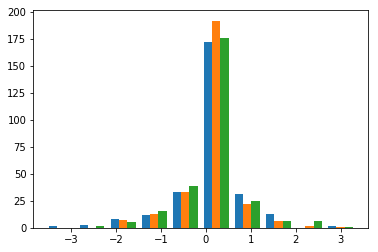

[]


In [50]:

#scale_symm_deriv_ind(Gfunc_scaler, Gderiv_data, 'C', 0, 276)
plt.hist(Gderiv_data)
plt.show()
extreme_idx = np.where(Gderiv_data > 10**10)
print(Gderiv_data[extreme_idx])

In [51]:
# This is not the atomic contribution!
# You need to sum everything up!
# Warning: Only summing up the contribution from one sample configuration
atom_xyz = np.zeros((1,3))
for atom in md_samplesArr[0]:
    atom_idx = atom.index
    subnet_ind = subnet_arr[atom.symbol]
    Gfunc_atom_ind = Gfunc_data[atom.symbol][atom_idx][0:1,:]
    dNNdG = dE_dG(subnet_ind, Gfunc_atom_ind)
    atom_xyz += np.matmul(np.transpose(dNNdG), symm_deriv_ind(at_idx_map, Gparam_dict, atoms=md_samplesArr[0], atom_idx = atom_idx, at_ref=3))

print(atom_xyz)

[[2.84720139 1.1331838  1.7784134 ]]


In [52]:
Gderiv_data.shape

(276, 3)

In [53]:
delta_force_atom_test = np.matmul(np.transpose(dNNdG), Gderiv_data)

In [54]:
print(delta_force_atom_test)

[[ 0.25929567  0.22411202 -0.16767422]]


In [55]:
Gderiv_data

array([[-8.46556428e-01, -1.72192715e+00,  1.66375266e+00],
       [ 2.84195515e-01,  5.78064211e-01, -5.58534584e-01],
       [ 6.69299532e-01,  1.36138006e+00, -1.31538647e+00],
       [ 2.89763536e-01,  5.89389772e-01, -5.69477516e-01],
       [ 1.10939572e-01,  2.25655201e-01, -2.18031546e-01],
       [ 4.54445007e-02,  9.24357988e-02, -8.93128989e-02],
       [ 2.06048418e-02,  4.19110120e-02, -4.04950682e-02],
       [ 1.03066746e-02,  2.09641581e-02, -2.02558939e-02],
       [ 5.61911767e-03,  1.14294936e-02, -1.10433536e-02],
       [ 3.29610752e-03,  6.70440486e-03, -6.47789970e-03],
       [ 2.05640485e-03,  4.18280368e-03, -4.04148963e-03],
       [ 1.35136589e-03,  2.74872831e-03, -2.65586382e-03],
       [ 9.27935675e-04,  1.88745556e-03, -1.82368876e-03],
       [ 6.61445997e-04,  1.34540567e-03, -1.29995178e-03],
       [ 4.86817392e-04,  9.90204618e-04, -9.56751022e-04],
       [ 3.68306429e-04,  7.49148927e-04, -7.23839284e-04],
       [ 2.85385272e-04,  5.80484221e-04

## Realization of Data ##
The problem is, each for the prediction of individual forces, it is necessary to sum up the contribution of other atoms in order to calculate one force. 

### Test the Prediction ###
Because currently we cannot run the nwchem on this docker, we decided to move this section to the capture section.

## Keras Gradient Test ##
Keras gradient is much more faster than the Method we are using. <br/> 
So far we are not able to tell which one is accurate

In [56]:
Gfunc_atom_ind = Gfunc_data['H'][3][0:1,:]
print(Gfunc_atom_ind.shape)

(1, 276)


In [78]:
import keras.backend as K

nb_symm = 276
G_tensor_ind = K.placeholder(shape = (1, nb_symm))
E_tensor_ind = h_subnet(G_tensor_ind)
dE_dG_ele = K.function([G_tensor_ind], K.gradients(E_tensor_ind, [G_tensor_ind]))

print(np.array(dE_dG_ele([Gfunc_atom_ind])).reshape((1,nb_symm)))
#print( np.array(dE_dG_ele([Gfunc_atom_ind])).reshape((1,nb_symm)))
dE_dG_mat = np.array(dE_dG_ele([Gfunc_atom_ind])).reshape((1,nb_symm))
print(dE_dG_mat.shape)
print(Gfunc_atom_ind.shape)
print(np.matmul(dE_dG_mat, Gfunc_atom_ind.transpose()))

h_subnet.predict(Gfunc_atom_ind)

[[-1.89128183e-02  1.69647066e-03 -4.33524419e-03 -2.92342156e-03
  -1.52752327e-03  3.19064688e-03  2.35583237e-03  3.75721371e-03
   4.24148329e-03  3.02885636e-03  2.84588826e-03  2.79659312e-03
   2.02006055e-03  4.68228711e-03  4.02584299e-03  2.37647677e-04
   1.68342958e-03  2.68229283e-03  1.69296551e-03  7.81830121e-03
   5.03112609e-03  4.89997095e-04  1.16977061e-03  3.27669946e-03
  -2.60794372e-03 -7.97521847e-04 -2.56337877e-03 -9.03740060e-03
   4.65419900e-04  7.25806691e-03  6.01928029e-03 -4.21912468e-04
   2.89157359e-03  7.12142605e-03  8.07228405e-03  1.34807662e-03
   1.17979839e-03  3.89131741e-03  7.22771278e-03  2.14374065e-03
   2.19790172e-03 -1.72344244e-05 -2.01308314e-04  3.76662170e-03
   5.07815741e-04  1.15616503e-03  2.27292138e-03  6.30637631e-03
  -2.46722321e-03 -1.18312764e-03 -1.33820930e-02 -7.47949770e-03
   4.26214840e-03  1.18164849e-02  6.09423826e-03  6.57081185e-03
  -5.33373095e-04  3.68697289e-03  3.22308857e-03  3.54757137e-03
   1.92244

array([[0.16759437]], dtype=float32)

In [58]:
def generate_neural_net_deriv(subnet, nb_symm):
    """Generate a dE/dG function for a given elemental sub-neural network.
        
        Args:
            subnet: keras.model object for the sub-neural network.
            nb_symm: int, number of symmetry functions for the vector.
        
        Outputs:
            subnet_deriv([G_ind]), a function that takes the symmetry vector of shape (1, nb_symm) of the given atom
            and return the dE/dG matrix for the atom. 
            
    """
    G_tensor_ind = K.placeholder(shape = (1, nb_symm))
    E_tensor_ind = subnet(G_tensor_ind)
    dE_dG_ele = K.function([G_tensor_ind], K.gradients(E_tensor_ind, [G_tensor_ind]))
    
    return dE_dG_ele

In [59]:
def generate_neural_net_deriv_array(subnet_arr, nb_symm):
    """Generated the array for the dE/dG function.
    !! For Elemental Neural Network only
        
        Args:
            subnet_arr: a pandas.Series() object that includes all the sub-neural network with its element
            nb_symm: number of symmetry functions for the vector. 
            
        Outputs: 
            a pandas.Serires() array of subnet_deriv([G_ind]), a function that takes the symmetry 
            vector of shape (1, nb_symm) of the given atom
            and return the dE/dG matrix for the atom. 
    """
    dE_dG_arr = pd.Series([])
    for element, subnet in subnet_arr.items():
        dE_dG_arr[element] = generate_neural_net_deriv(subnet, nb_symm)
    
    return dE_dG_arr

In [60]:
dE_dG_arr = generate_neural_net_deriv_array(subnet_arr, 276)
print(dE_dG_arr)

H    <keras.backend.tensorflow_backend.Function obj...
O    <keras.backend.tensorflow_backend.Function obj...
C    <keras.backend.tensorflow_backend.Function obj...
N    <keras.backend.tensorflow_backend.Function obj...
dtype: object


In [61]:
# rc_deriv = generate_neural_net_deriv(rc_subnet, 1)
# Feat_data_test =  Feat_data['H'][3][0:1,:]
# print(Feat_data_test.shape)

# print(rc_deriv([Feat_data_test]))
# print(Feat_data_test)

In [62]:
def dE_dG_select(dE_dG_arr, element, Gfunc_ind):
    """
    
    Assumes that Gfunc_ind has the same No. Symmetry function as the function for dE_dG_arr
    """
    dE_dG_func = dE_dG_arr[element]
    output =  np.array(dE_dG_func([Gfunc_ind])).reshape(Gfunc_ind.shape)
    return output

#### Test: See what does the sclaer function do to the Gfunc function ####

In [63]:
#data_test = np.copy(Gfunc_data['C'][0][0:1,:])
#plt.hist(data_test)
#plt.show()

# #new_data_test = Gfunc_scaler['C'][0].transform(data_test)
# extreme_idx = np.where(new_data_test > 10**10)
# print(extreme_idx)
# print(new_data_test[extreme_idx])


# Gfunc_scaler['C'][0].scale_
from ase.io import read, write
glycine_test = read('./glycine.xyz')
from SymmFuncInd import get_atoms_inp
import SymmFuncInd 
glycine_inp = get_atoms_inp(glycine_test, at_idx_map, Gparam_dict)
glycine_Gfunc = SymmFuncInd.symm_func_mol(glycine_test, at_idx_map, Gparam_dict) 
type(glycine_Gfunc)

pandas.core.series.Series

In [77]:
# This is not the atomic contribution!
# You need to sum everything up!
# Warning: Only summing up the contribution from one sample configuration
# Problem is the scaling Effect
atom_xyz = np.zeros((1,3))
for atom in glycine_test:
    atom_idx = atom.index
    element = atom.symbol
    subnet_ind = subnet_arr[atom.symbol] # Individual Sub-Neural Network ???Necessary?
    Gfunc_atom_ind = glycine_Gfunc[element][atom_idx][0:1,:] # This is the sccaled Gfunc Data!
    dNNdG = dE_dG_select(dE_dG_arr, element, Gfunc_atom_ind)
    Gderiv_0 = symm_deriv_ind(at_idx_map, Gparam_dict, atoms=glycine_test, atom_idx = atom_idx, at_ref=1)
    atom_xyz = np.add(atom_xyz, np.matmul(dNNdG, Gderiv_0))

print(atom_xyz)

[[ 3.60515149  0.24844039 -0.17433443]]


In [65]:
# For Energy Value Testing
# So far the energy value is consistent with the numerical force calculation
energy = np.zeros(1)
for atom in glycine_test:
    atom_idx = atom.index
    element = atom.symbol
    subnet_ind = subnet_arr[atom.symbol]
    Gfunc_atom_ind = glycine_Gfunc[element][atom_idx][0:1, :]
    de = subnet_ind.predict(Gfunc_atom_ind)
    de = de.T[0]
    energy = np.add(energy, de)
print(energy)

[-4.4020296]


In [66]:
atom_xyz = np.zeros((1,3))
for atom in md_samplesArr[0]:
    atom_idx = atom.index
    element = atom.symbol
    subnet_ind = subnet_arr[atom.symbol]
    Gfunc_atom_ind = Gfunc_data[element][atom_idx][0:1,:] # This is the sccaled Gfunc Data!
    dNNdG = dE_dG_select(dE_dG_arr, element, Gfunc_atom_ind)
    Gderiv_0 = symm_deriv_ind(at_idx_map, Gparam_dict, atoms=md_samplesArr[0], atom_idx = atom_idx, at_ref=1)

    print('atom_idx:', atom_idx)
    atom_xyz += np.matmul(dNNdG, Gderiv_0)

print(atom_xyz)

atom_idx: 0
atom_idx: 1
atom_idx: 2
atom_idx: 3
atom_idx: 4
atom_idx: 5
atom_idx: 6
atom_idx: 7
atom_idx: 8
atom_idx: 9
[[ 3.60515149  0.24844039 -0.17433443]]


In [67]:
atom_xyz = np.zeros((1,3))
for atom in md_samplesArr[0]:
    atom_idx = atom.index
    element = atom.symbol
    subnet_ind = subnet_arr[atom.symbol]
    Gfunc_atom_ind = Gfunc_data[element][atom_idx][0:1,:] # This is the sccaled Gfunc Data!
    dNNdG = dE_dG_select(dE_dG_arr, element, Gfunc_atom_ind)
    Gderiv_0 = symm_deriv_ind(at_idx_map, Gparam_dict, atoms=md_samplesArr[0], atom_idx = atom_idx, at_ref=2)

    atom_xyz += np.matmul(dNNdG, Gderiv_0)

print(atom_xyz)

[[ 2.5184764  -3.65030309  3.47083322]]


In [68]:
def ddR_radial_filter(Rs, eta, Rij, xyz_i, xyz_j):
    """ derivative of radial filter for symmetry functions with respect to dR
    ! We want it to be  dGi/dR * -1/R, so that it will just work for
    dGi/dx = result * x 
    
    
    # Arguments
        Rs, eta: radial symmetry function parameters; float
        Rij: distance values between two given atoms i and j;
                1D numpy array of length nb_samples
        xyz_arr: the xyz coordinate of the atom, 
                2D numpy array of length nb_samples. 

    # Returns
        G_rad_ij: radial filter values; 1D numpy array of length nb_samples
    """
    
    

    

        
        
    xi = xyz_i[0]
    yi = xyz_i[1]
    zi = xyz_i[2]
    
    xj = xyz_j[0]
    yj = xyz_j[1]
    zj = xyz_j[2]
    
    ddRij_G = 2*np.exp(-eta * (Rij-Rs)**2)*eta*(Rij-Rs)/Rij
    
    ddxi_dRij = (xi-xj) / Rij
    ddxi_dG = ddxi_dRij * ddRij_G
    
    ddyi_dRij = (yi-yj) / Rij
    ddyi_dG = ddyi_dRij * ddRij_G    
    
    ddzi_dRij = (zi-zj) / Rij
    ddzi_dG = ddzi_dRij * ddRij_G
    

    
    return np.array([ddxi_dG, ddyi_dG, ddzi_dG])


# Angular Filter Function is the Angular Symmetry Function
# For a given set of (eta, zeta, lambd), caclaulte
# The augular component of G value for all the neighbour atoms

# To change the filter function, modify it here.
def ddR_angular_filter(Rij, Rik, Rjk, eta, zeta, lambd, xyz_i, xyz_j, xyz_k):
    """angular filter for angular symmetry functions
    # Arguments
        eta, zeta, lambd: angular symmetry function parameters
        Rij, Rik, Rjk: distances among three atoms i, j, k; 1D arrays of length nb_samples

    # Returns
        G_ang_ij: angular filter values; 1D numpy array of length nb_samples

    """                
    cos_angle = (Rij**2 + Rik**2 - Rjk**2)/(2.0 * Rij * Rik)
    rad_filter = np.exp(-eta*(Rij + Rik + Rjk)**2)
    G_ang_ijk = 2**(1.0-zeta) * (1.0 + lambd * cos_angle)**zeta * rad_filter
    
    xi = xyz_i[0]
    yi = xyz_i[1]
    zi = xyz_i[2]
    
    xj = xyz_j[0]
    yj = xyz_j[1]
    zj = xyz_j[2]
    
    xk = xyz_k[0]
    yk = xyz_k[1]
    zk = xyz_k[2]

    
    
    ddRij_G = (2**(1-zeta)*np.exp(-eta*(Rij+Rik+Rjk)**2)*(1+ lambd*(Rjk**2+Rik**2-Rjk**2) \
                                                         / (2*Rij*Rik))**(zeta) \
            * (-2*eta*Rij*(Rij+Rik+Rjk)*(2*Rij*Rjk+lambd*(Rij**2+Rjk**2-Rjk**2)) + lambd*(Rij**2 - Rik**2 + Rjk**2)*zeta)) \
            / (Rij*(2*Rij*Rik + lambd *(Rij**2+Rik**2-Rjk**2)))
    
    ddRik_G = (2**(1-zeta)*np.exp(-eta*(Rij+Rik+Rjk)**2)*(1+ lambd*(Rjk**2+Rik**2-Rjk**2) \
                                                          / (2*Rij*Rik))**(zeta) \
            * (-2*eta*Rij*(Rij+Rik+Rjk)*(2*Rij*Rjk+lambd*(Rij**2+Rjk**2-Rjk**2)) + lambd*(Rij**2 - Rik**2 + Rjk**2)*zeta)) \
            / (Rik*(2*Rij*Rik + lambd *(Rij**2+Rik**2-Rjk**2)))
    
    ddxi_Rij = (xi - xj) / Rij
    ddxi_Rik = (xi - xk) / Rik

    ddyi_Rij = (yi - yj) / Rij
    ddyi_Rik = (yi - yk) / Rik
    
    ddzi_Rij = (zi - zj) / Rij
    ddzi_Rik = (zi - zk) / Rik
    
    
    ddxi_G = ddRij_G * ddxi_Rij + ddRik_G * ddxi_Rik
    ddyi_G = ddRij_G * ddyi_Rij + ddRik_G * ddyi_Rik
    ddzi_G = ddRij_G * ddzi_Rij + ddRik_G * ddzi_Rik

    return np.array([ddxi_G, ddyi_G, ddzi_G])

